In [ ]:
#911 Calls Python Project
#Datasource: Kaggle 911.csv

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#Read in dataset

df = pd.read_csv('911.csv')

In [3]:
#Initial check of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
#Determine the top 5 zipcodes for 911 calls

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
#Determine top 5 townships for 911 calls

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
#Determine the number of unique titles

df['title'].nunique()

110

In [8]:
#Creating new features
###In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. 
###Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [9]:
#Determine the most common reason for a 911 call based off of this new column

df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

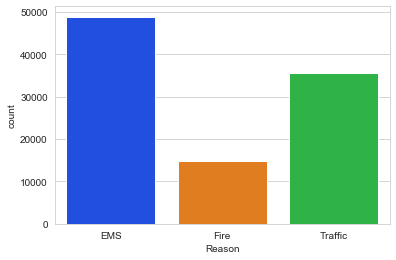

In [11]:
#Create a countplot of 911 calls by reason

sns.countplot(x='Reason',data=df,palette='bright')

In [12]:
#Determine the data type of the objects in the timeStamp column

type(df['timeStamp'].iloc[0])

str

In [13]:
#Convert the column from strings to DateTime objects

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
#Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of 
#the week

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)


df['Day of Week'] = df['Day of Week'].map(dmap)

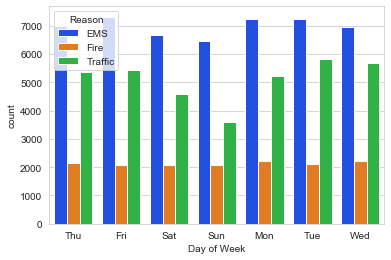

In [19]:
#Create a countplot of the Day of Week column with the hue based off of the reason column

sns.countplot(x='Day of Week',data=df,hue='Reason',palette='bright')

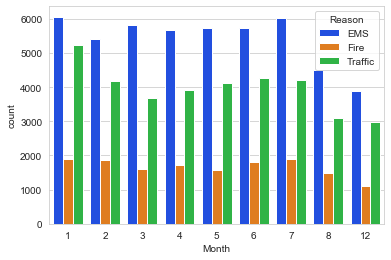

In [20]:
#Create a countplot of the Month column

sns.countplot(x='Month',data=df,hue='Reason',palette='bright')

In [21]:
#Create a groupby object called byMonth, where you group the DataFrame by the month column and use the count() method for 
#aggregation

byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


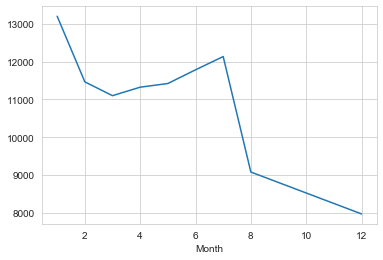

In [22]:
#Create a plot indicating the number of calls per month

byMonth['title'].plot()

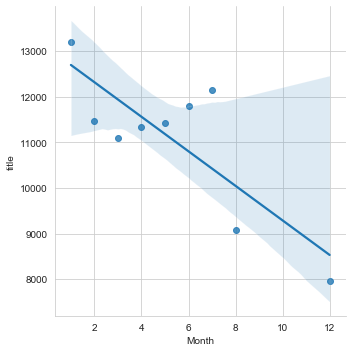

In [23]:
#Use seaborn's lmplot() to create a linear fit on the number of calls per month

sns.lmplot(x='Month',y='title',data=byMonth.reset_index())

In [24]:
#Create a new column called 'Date' that contains the date from the timeStamp column

df['Date']=df['timeStamp'].apply(lambda ts: ts.date())

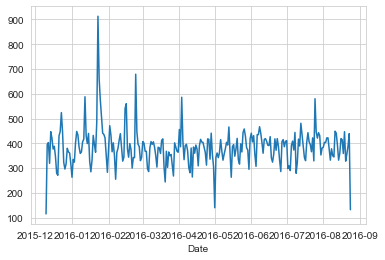

In [26]:
#Aggregate and create a plot of counts of 911 calls

df.groupby('Date').count()['title'].plot()
plt.show()

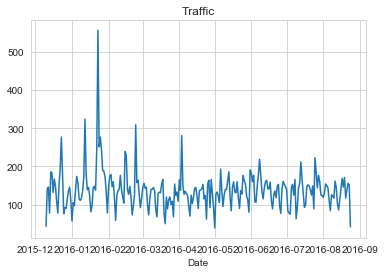

In [27]:
#Create separate plots with each plot representing a reason for the 911 call

df[df['Reason']=='Traffic'].groupby('Date').count()['title'].plot()
plt.title('Traffic')
plt.show()

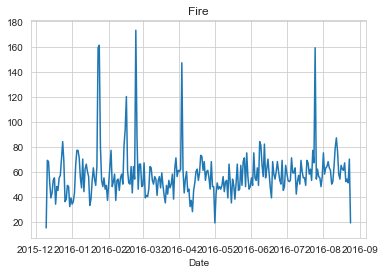

In [28]:
df[df['Reason']=='Fire'].groupby('Date').count()['title'].plot()
plt.title('Fire')
plt.show()

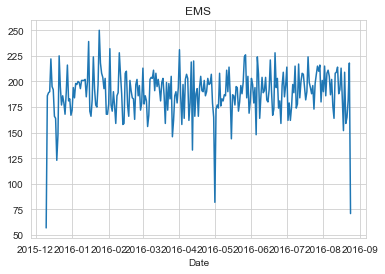

In [29]:
df[df['Reason']=='EMS'].groupby('Date').count()['title'].plot()
plt.title('EMS')
plt.show()

In [30]:
#Create heatmaps 
#Restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week

dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


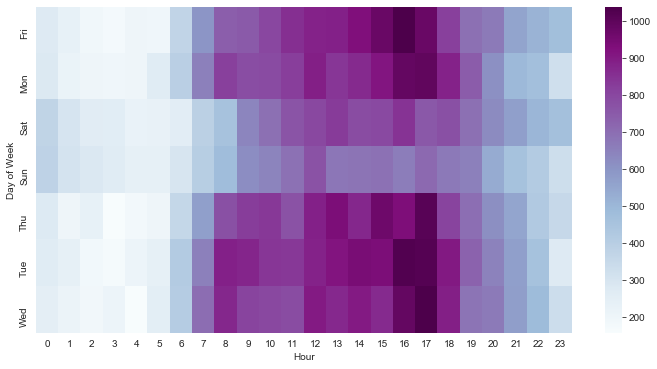

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='BuPu')

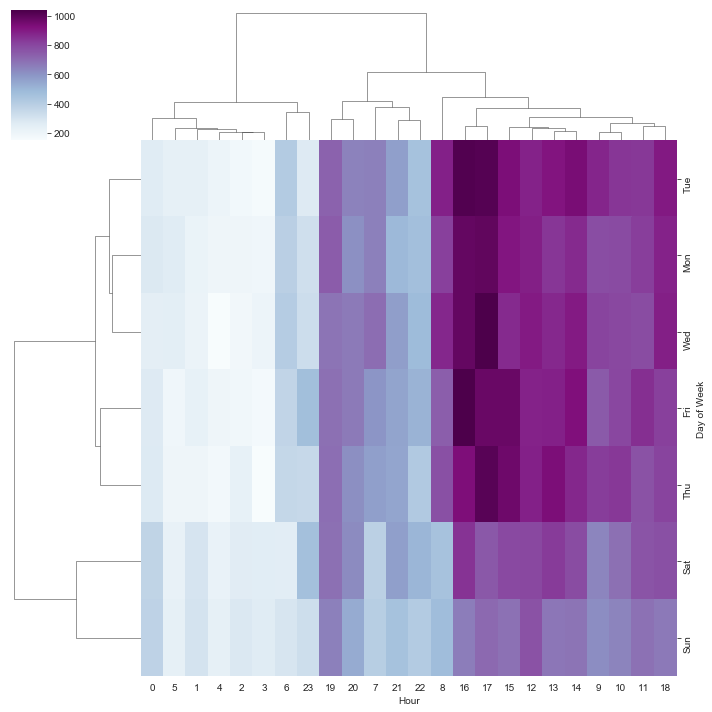

In [37]:
#Create a clustermap using this DataFrame

sns.clustermap(dayHour,cmap='BuPu')